In [7]:
from sklearn import tree
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

In [6]:
cd with_same_ship_ids_between_db/

/Users/maria/Desktop/Датасет_рыба/with_same_ship_ids_between_db


In [8]:
catch = pd.read_csv("catch.csv")

In [10]:
product = pd.read_csv("product.csv")

In [11]:
ext1 = pd.read_csv("Ext.csv")
ext2 = pd.read_csv("Ext2.csv")

In [12]:
catch_product = pd.merge(catch, product, how="outer", on=['id_ves','date'])

In [13]:
ext1_2 = pd.merge(ext1, ext2, how="outer", on=['id_vsd'])

In [14]:
fish_numbers = pd.read_csv('fish.csv', sep=';')
fish_id_new = fish_numbers.id_fish.unique()

In [15]:
new_df = pd.DataFrame(columns = ['fish_id', 'fish', 'catch_volume', 'rec_volume', 'id_own'])


for fish in fish_id_new:
    if catch_product.loc[catch_product['id_fish'] == fish].catch_volume.sum()*1000  <  ext1_2.loc[ext1_2['id_fish'] == fish].volume.sum():
        new_df = new_df.append({'fish_id': fish, 
                                'fish': fish_numbers.loc[fish_numbers['id_fish'] == fish].fish.to_list()[0], 
                                'catch_volume': catch_product.loc[catch_product['id_fish'] == fish].catch_volume.sum()*1000,
                                'rec_volume':ext1_2.loc[ext1_2['id_fish'] == fish].volume.sum(),
                               'id_own': ext1_2.loc[ext1_2['id_fish'] == fish].id_own.to_list()}, ignore_index=True)
 

In [17]:
zero_catch = new_df.loc[new_df['catch_volume'] == 0]

In [18]:
zero_catch

,fish_id,fish,catch_volume,rec_volume,id_own
0,45,аргентина,0.0,1203.0,"[1002.0, 1002.0, 1002.0, 1002.0, 1002.0, 1002...."
1,71,треска ярусная,0.0,45780.0,"[1177.0, 896.0]"
2,302,корюшка,0.0,66.0,"[-1.0, 1219.0]"
3,512,ставрида,0.0,50310.0,"[1274.0, 1274.0]"
6,863,креветка гренландская,0.0,1414.0,[1202.0]
8,885,петух морской,0.0,644.0,"[1002.0, 1002.0]"
10,212,макрурус северный,0.0,60.0,"[1241.0, 1274.0]"
12,158,гадикул (большеглазая тресочка),0.0,5310.0,"[1002.0, 1002.0, 1002.0, 1002.0, 1002.0, 1002...."
13,383,малый полосатик (минке),0.0,1764.0,"[-1.0, 1156.0]"


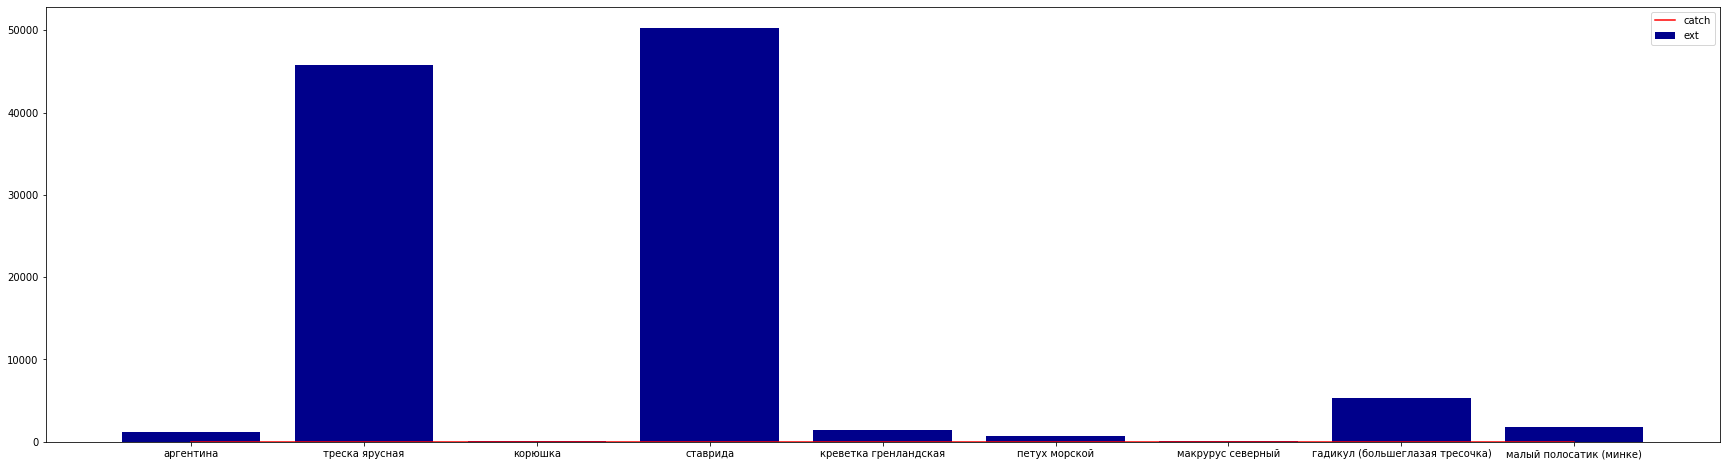

In [23]:
plt.figure(figsize=(30, 8))
plt.plot(zero_catch['fish'], zero_catch['catch_volume'], color='red', label='catch')
plt.bar(zero_catch['fish'], zero_catch['rec_volume'], color='darkblue', label='ext')
plt.legend()